<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
from nltk.corpus import stopwords

%matplotlib inline
plt.style.use('fivethirtyeight') 

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [2]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [3]:
# Answer:
movies.shape


(979, 6)

#### Check the data type of each column.

In [4]:
# Answer:
movies.dtypes


star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [5]:
# Answer:
movies.duration.mean()


120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [6]:
movies.duration.min()


64

In [7]:
movies.duration.max()


242

#### Create a histogram of duration, choosing an "appropriate" number of bins.

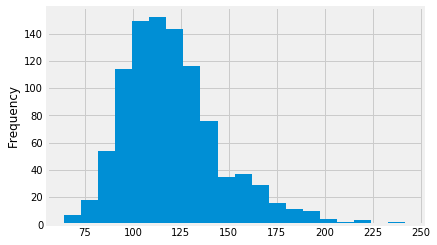

In [8]:
# Answer:
movies.duration.plot.hist(bins=20)


#### Use a box plot to display that same data.

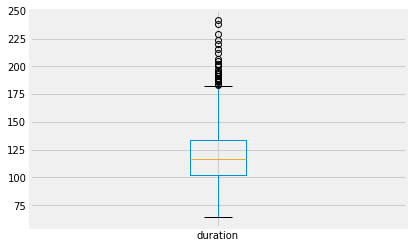

In [9]:
# Answer:
movies.duration.plot.box()


## Intermediate level

#### Count how many movies have each of the content ratings.

In [10]:
movies['content_rating'].value_counts()


R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

Text(0, 0.5, 'Title Count')

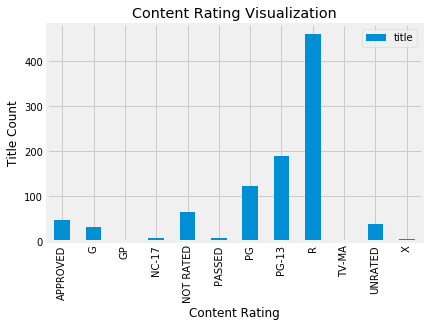

In [11]:
movies[['content_rating','title']].groupby('content_rating').count().plot(kind='bar',title='Content Rating Visualization')
plt.xlabel('Content Rating')
plt.ylabel('Title Count')

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [12]:
# Answer:
movies['content_rating'].replace(['NOT RATED','APPROVED','PASSED','GP'],'UNRATED')#.head()


0            R
1            R
2            R
3        PG-13
4            R
5      UNRATED
6      UNRATED
7        PG-13
8            R
9            R
10       PG-13
11       PG-13
12          PG
13       PG-13
14       PG-13
15       PG-13
16           R
17     UNRATED
18           R
19          PG
20           R
21           R
22     UNRATED
23           R
24           R
25       PG-13
26       PG-13
27           R
28           R
29     UNRATED
        ...   
949         PG
950          R
951          R
952          R
953         PG
954      PG-13
955          R
956         PG
957          R
958      PG-13
959          R
960      PG-13
961          R
962         PG
963          R
964      PG-13
965      PG-13
966      PG-13
967          R
968          R
969          R
970          R
971          R
972      NC-17
973      PG-13
974         PG
975         PG
976      PG-13
977         PG
978          R
Name: content_rating, Length: 979, dtype: object

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [13]:
# Answer:
movies['content_rating'].replace(['X','TV-MA'],'NC-17')#.head()

0              R
1              R
2              R
3          PG-13
4              R
5      NOT RATED
6      NOT RATED
7          PG-13
8              R
9              R
10         PG-13
11         PG-13
12            PG
13         PG-13
14         PG-13
15         PG-13
16             R
17       UNRATED
18             R
19            PG
20             R
21             R
22      APPROVED
23             R
24             R
25         PG-13
26         PG-13
27             R
28             R
29        PASSED
         ...    
949           PG
950            R
951            R
952            R
953           PG
954        PG-13
955            R
956           PG
957            R
958        PG-13
959            R
960        PG-13
961            R
962           PG
963            R
964        PG-13
965        PG-13
966        PG-13
967            R
968            R
969            R
970            R
971            R
972        NC-17
973        PG-13
974           PG
975           PG
976        PG-

#### Count the number of missing values in each column.

In [14]:
# Answer:
# count the number of missing values in each column
movies.isnull().sum(axis=0)


star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [15]:
# Answer:
movies[movies['content_rating'].isnull()]


,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [16]:
movies.at[(123,978),'content_rating'] = 'PG'
movies.at[189,'content_rating'] = 'PG - 13'

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [17]:
# Answer: calculate mean of star rating for movies for 2 hours or longer
movies[movies['duration'] >= 120]['star_rating'].mean()


7.948898678414082

In [18]:
# Answer: calculate mean of star rating for movies shorter than 2 hours
movies[movies['duration'] < 120]['star_rating'].mean()

7.838666666666657

In [19]:
# do comparison
movies[movies['duration'] >= 120]['star_rating'].mean() - movies[movies['duration'] < 120]['star_rating'].mean()


0.11023201174742514

#### Use a visualization to detect whether there is a relationship between duration and star rating.

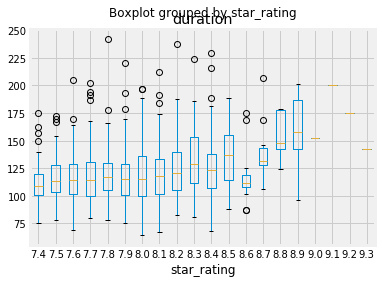

In [20]:
# Answer:
movies.boxplot(column='duration', by='star_rating')


#### Calculate the average duration for each genre.

In [21]:
# Answer:
movies[['duration', 'genre']].groupby('genre').mean()


,duration
genre,
Action,126.485294
Adventure,134.840000
Animation,96.596774
Biography,131.844156
Comedy,107.602564
Crime,122.298387
Drama,126.539568
Family,107.500000
Fantasy,112.000000


## Advanced level

#### Visualize the relationship between content rating and duration.

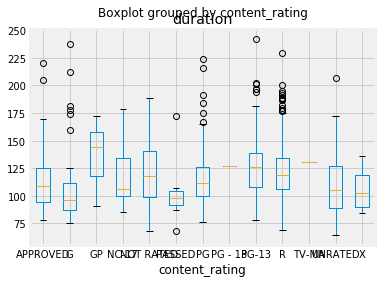

In [22]:
# Answer:
movies.boxplot(column='duration', by='content_rating')


#### Determine the top rated movie (by star rating) for each genre.

In [23]:
# Answer:
movies.sort_values('star_rating', ascending = False).groupby('genre')['star_rating'].first()
# can add title as well, or other information that want to display
movies.sort_values('star_rating', ascending = False).groupby('genre')['title', 'star_rating'].first()



,title,star_rating
genre,,
Action,The Dark Knight,9.0
Adventure,The Lord of the Rings: The Return of the King,8.9
Animation,Spirited Away,8.6
Biography,Schindler's List,8.9
Comedy,Modern Times,8.6
Crime,The Shawshank Redemption,9.3
Drama,12 Angry Men,8.9
Family,E.T. the Extra-Terrestrial,7.9
Fantasy,The City of Lost Children,7.7


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [24]:
# Answer:
result = movies[movies['title'].isin(movies[movies.duplicated(['title'])]['title'])]
result.sort_values('title')


,star_rating,title,content_rating,genre,duration,actors_list
703,7.6,Dracula,APPROVED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [25]:
# Answer:
movies.genre.value_counts()
genres = ['Drama', 'Comedy', 'Action', 'Crime', 'Biography', 'Adventure', 'Animation', 'Horror', 'Mystery']
movies[movies.genre.isin(genres)].groupby('genre').star_rating.mean()


genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [26]:
# Answer:
genres = movies['genre'].value_counts()[movies['genre'].value_counts() > 10].index
movies[movies['genre'].isin(genres)].groupby('genre')['star_rating'].mean()


genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [27]:
# Answer: calculate mean
movies[['star_rating', 'genre']].groupby('genre').mean()


,star_rating
genre,
Action,7.884559
Adventure,7.933333
Animation,7.914516
Biography,7.862338
Comedy,7.822436
Crime,7.916935
Drama,7.902518
Family,7.850000
Fantasy,7.700000


In [28]:
# filter using boolean series
movies.groupby('genre').star_rating.mean()[movies.genre.value_counts() >= 10]

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 4: aggregate by count and mean, then filter using the count

In [29]:
# Answer:
genre = movies.groupby('genre').star_rating.agg(['count', 'mean'])


In [30]:
genre[genre['count'] >= 10]

,count,mean
genre,,
Action,136,7.884559
Adventure,75,7.933333
Animation,62,7.914516
Biography,77,7.862338
Comedy,156,7.822436
Crime,124,7.916935
Drama,278,7.902518
Horror,29,7.806897
Mystery,16,7.975000


## Bonus

#### Figure out something "interesting" using the actors data!

In [32]:
# the actor list contains tuple, list, string each row, and how to convert this to count actor name by freqcount()
# need to figure out
uniActor = set()
_als = movies['actors_list']
print(type(_als))
for bl in _als.iteritems():
    print((bl))
    #for a in al:
        #print(b)
        #uniActor.add(str(a))
#print(uniActor)

<class 'pandas.core.series.Series'>
(0, "[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunton']")
(1, "[u'Marlon Brando', u'Al Pacino', u'James Caan']")
(2, "[u'Al Pacino', u'Robert De Niro', u'Robert Duvall']")
(3, "[u'Christian Bale', u'Heath Ledger', u'Aaron Eckhart']")
(4, "[u'John Travolta', u'Uma Thurman', u'Samuel L. Jackson']")
(5, "[u'Henry Fonda', u'Lee J. Cobb', u'Martin Balsam']")
(6, "[u'Clint Eastwood', u'Eli Wallach', u'Lee Van Cleef']")
(7, "[u'Elijah Wood', u'Viggo Mortensen', u'Ian McKellen']")
(8, "[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kingsley']")
(9, "[u'Brad Pitt', u'Edward Norton', u'Helena Bonham Carter']")
(10, "[u'Elijah Wood', u'Ian McKellen', u'Orlando Bloom']")
(11, "[u'Leonardo DiCaprio', u'Joseph Gordon-Levitt', u'Ellen Page']")
(12, "[u'Mark Hamill', u'Harrison Ford', u'Carrie Fisher']")
(13, "[u'Tom Hanks', u'Robin Wright', u'Gary Sinise']")
(14, "[u'Elijah Wood', u'Ian McKellen', u'Viggo Mortensen']")
(15, "[u'Matthew McConaughey', u'Anne Hathaway', u'J